<a href="https://colab.research.google.com/github/Vspnaik/RNN-and-LSTM-for-Telugu-language-classification/blob/main/sentiment_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Product Review: Sentiment Analysis**

In [1]:
!pip install scikit-plot

In [4]:
!kaggle datasets download mansithummar67/flipkart-product-review-dataset

Dataset URL: https://www.kaggle.com/datasets/mansithummar67/flipkart-product-review-dataset
License(s): ODbL-1.0
  0% 0.00/3.89M [00:00<?, ?B/s]
100% 3.89M/3.89M [00:00<00:00, 210MB/s]


In [1]:
!pip install --upgrade scikit-plot

In [3]:
!pip install scipy==1.7.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
a

In [2]:
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/flipkart-product-review-dataset.zip'

# Directory where you want to extract the contents
extract_to_dir = '/content'

# Ensure the extraction directory exists
os.makedirs(extract_to_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"Files extracted to: {extract_to_dir}")


Files extracted to: /content


In [6]:
dataset = pd.read_csv('/content/flipkart_product.csv', encoding='latin-1')


In [7]:
dataset.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [8]:
dataset.shape

(189874, 5)

In [9]:
dataset.isnull().sum()

,0
ProductName,0
Price,1
Rate,1
Review,4
Summary,14


## Data Cleaning:
------

In [11]:
dataset = dataset[['ProductName','Price','Review','Rate', 'Summary']]

In [12]:
dataset.isnull().sum()

,0
ProductName,0
Price,1
Review,4
Rate,1
Summary,14


In [13]:
dataset['Review'] = dataset['Review'].fillna('Not Avialable')

In [14]:
dataset = dataset.dropna()

In [15]:
data = dataset['Rate'].value_counts()

<Axes: xlabel='Rate'>

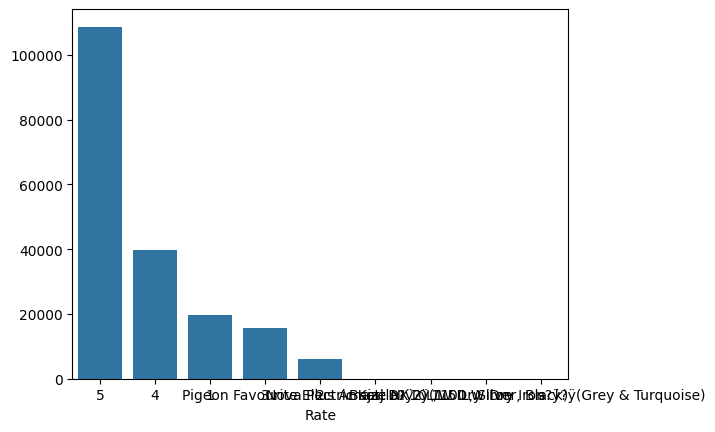

In [16]:
sns.barplot(x=data.index, y=data.values)

**Need to map 1,2 - Unhappy, 3-OK and 4,5 - Happy**

**Fake Reviews Provided by User**

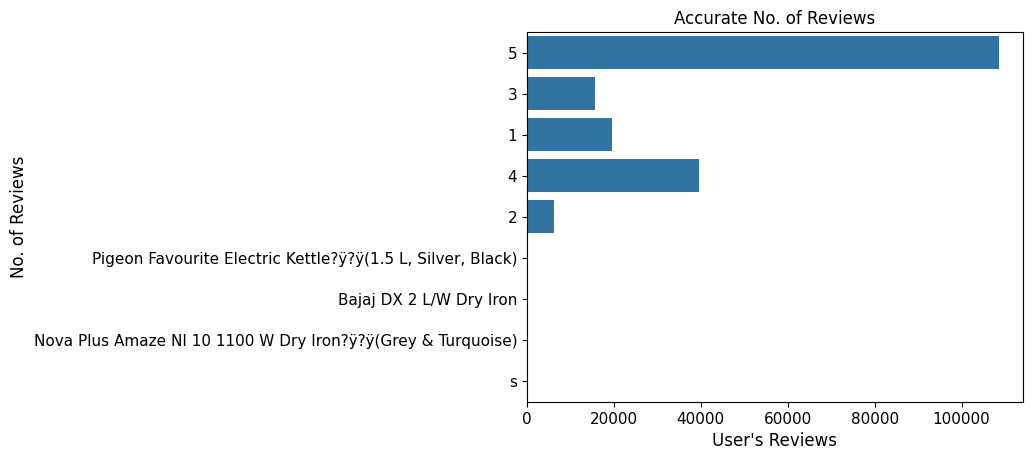

In [17]:
ax_plt = sns.countplot(dataset['Rate'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

**Feature Transformation**


In [ ]:
data=dataset['Summary']
train_data=dataset['Summary']

y_target=dataset['Rate'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [ ]:
vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=10000)
vectorize_word.fit(data)
train_features_word = vectorize_word.transform(train_data)

In [ ]:
vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)
vectorize_char.fit(data)
train_features_char = vectorize_char.transform(train_data)
train_features = hstack([train_features_char, train_features_word])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y_target,test_size=0.3,random_state=101,shuffle=True)

**SVC Model**

In [ ]:
lsvm = LinearSVC(class_weight='balanced')
l = lsvm.fit(X_train,y_train)

**Linear SVC Metric Over Training:**

In [ ]:
pred_train = l.predict(X_train)

In [ ]:
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train)))
print(classification_report(y_train,pred_train))

Accuracy Train: 0.9886908841672378
              precision    recall  f1-score   support

       Happy       1.00      0.99      0.99     42745
          Ok       0.89      0.97      0.93      3014
     Unhappy       0.97      1.00      0.99      3847

   micro avg       0.99      0.99      0.99     49606
   macro avg       0.95      0.99      0.97     49606
weighted avg       0.99      0.99      0.99     49606



**Linear SVC Metric Over Test:**

In [ ]:
pred_test=l.predict(X_test)

In [ ]:
print("Accuracy Test : {}".format(accuracy_score(y_test,pred_test)))
print(classification_report(y_test,pred_test))

Accuracy Test : 0.9013216687832181
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.39      0.38      0.39      1336
     Unhappy       0.75      0.74      0.75      1682

   micro avg       0.90      0.90      0.90     21261
   macro avg       0.70      0.69      0.70     21261
weighted avg       0.90      0.90      0.90     21261



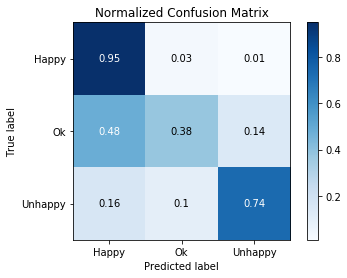

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)
plt.show()

In [ ]:
svm1=SGDClassifier(class_weight='balanced',n_jobs=-1,n_iter=300)
svm1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=300, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

**SGD Metric Over Training:**

In [ ]:
pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.9395637624480909
              precision    recall  f1-score   support

       Happy       0.98      0.96      0.97     42745
          Ok       0.61      0.71      0.66      3014
     Unhappy       0.83      0.88      0.85      3847

   micro avg       0.94      0.94      0.94     49606
   macro avg       0.81      0.85      0.83     49606
weighted avg       0.94      0.94      0.94     49606



**SGD Metric Over Test**

In [ ]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.8998636000188138
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.40      0.40      0.40      1336
     Unhappy       0.72      0.76      0.74      1682

   micro avg       0.90      0.90      0.90     21261
   macro avg       0.69      0.70      0.70     21261
weighted avg       0.90      0.90      0.90     21261



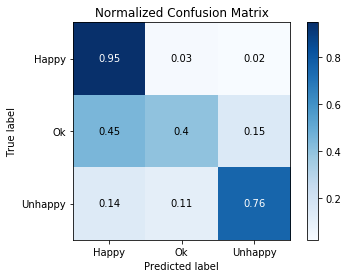

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test_sgd, normalize=True)
plt.show()